# $$ \mathbb{Semester } \text{  1} $$

In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 30
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15,6)

# $${\textbf{Assignment 1}}$$

#### Q1. Write a function that inputs a list, and a number and returns a new list which contains only interger multiples of the the number.

In [2]:
def multiple(listnum,n):
    mul=[num for num in listnum if num % n == 0]
    return mul

a = [7,3,6,5,9,4,5]
b=3
multiple(a,b)

[3, 6, 9]

#### Q2. Write a function which inputs two vectors (of arbitrary dimension) and returns their dot product.

In [3]:
def dot_product(l1, l2):
    return sum(x*y for x,y in zip(l1,l2))

a=[1, 2, 10]
b=[4, 7, 2]
dot_product(a,b)

38

#### Q3. Write a function which inputs two vectors (three dimensional) and returns their cross product.

In [4]:
def cross_product(u,v):  
    return ([u[1]*v[2]-u[2]*v[1], 
             u[2]*v[0]-u[0]*v[2],
             u[0]*v[1]-u[1]*v[0]])

a=[1, 2, 3]
b=[5, 6, 8]
cross_product(a,b)

[-2, 7, -4]

#### Q4. Write a program which inputs (x,a,b) and calculates confluenet hypergeometric function,$F(a, b, x)$
Make default values of a and b to be 1 and 2.
 
  The confluent hypergeometric function of the first kind,also known as Kummer’s function and sometimes denoted by M(a,b,z).
#### $$\displaystyle{{}^{}{\phantom{1}_1}\text{F}_1(a,b,z)=\sum_{k=0}^\infty \frac{(a)_k}{(b)_k} \frac{z^k}{k!}}$$

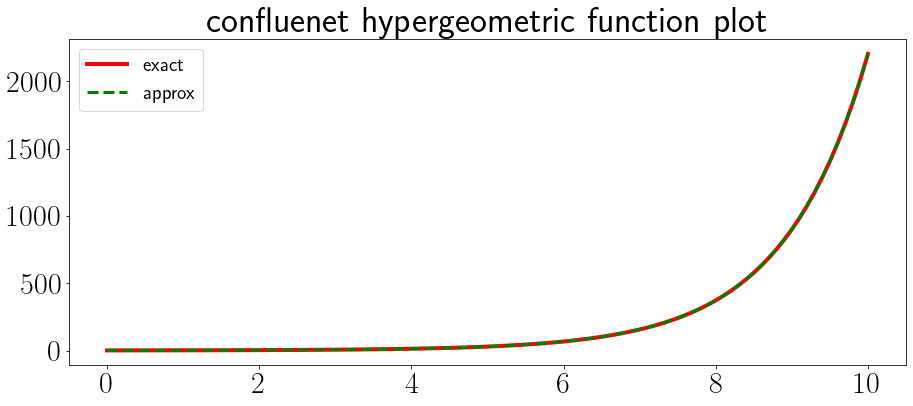

In [5]:
def h1f1(x,a,b,n):
    
    def f1(x,a,b,n=1):
        sumi=1
        t=1
        while(abs(t)>0.000000000001):
            t=t*(a/b)*(x/n)
            sumi=sumi+t
            n=n+1
            a=a+1
            b=b+1
        return sumi

    plt.plot( X, sc.hyp1f1(a,b, X),'r-', label='exact', linewidth=4)
    plt.plot( X, [ f1(x,1,2) for x in X ], 'g--', label = 'approx', linewidth=3)
    plt.title('confluenet hypergeometric function plot')
    plt.legend()
    
X=[ i/10 for i in range (0,101) ]
h1f1(X,1,2,1)

### 5. Write a function which returns the mean, median and mode of an array. 
    You may use python ufunc and methods like sort(), count() etc.

##### Mean : $\displaystyle{{\bar{x}}=\frac{x_1 + x_2 + ... + x_n}{n}=\sum_{i=1}^n \frac{x_i}{n}}$
##### Median = Size of $\frac{(n+1)}{2}$th item for odd term of n and Median = average of $\frac{n}{2}$th & $\frac{(n+2)}{2}$th item for even term of n.
##### Mode is that value in a series of observation which occurs with greatest frequency.

In [6]:
def mmm(n_num):
    n = len(n_num)
    n_num.sort()
    #mean
    m1= str(sum(n_num) / n)
    #median
    if n % 2 == 0:
        median1 = n_num[n//2]
        median2 = n_num[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = n_num[n//2]
    m2= str(median)
    #mode
    L1=[]
    i = 0
    while i < len(n_num) :
        L1.append(n_num.count(n_num[i]))
        i += 1
    d1 = dict(zip(n_num, L1))
    d2=[k for (k,v) in d1.items() if v == max(L1)]
    m3=d2[0]
    return m1,m2,m3

s=[1, 2, 3, 2, 4, 2, 4, 8, 5, 7, 6]
print('Mean \t:',mmm(s)[0],'\nMedian \t:',mmm(s)[1],'\nMode \t:',mmm(s)[2])

Mean 	: 4.0 
Median 	: 4 
Mode 	: 2


# $${\textbf{Assignment 2}}$$

### Q1. Reverse the order of a given array :

 $\qquad\qquad[16,7,5, 28]$ becomes $[28,5,7,16]$

In [7]:
print('Original Array: ', str(np.array([16,7,5,28])),'\t-> Reversed Array: ', str(np.flip(np.array([16,7,5,28])))) 

Original Array:  [16  7  5 28] 	-> Reversed Array:  [28  5  7 16]


### Q2. Write a NumPy program to create a 2d array with 1 on the border and 0 inside.

In [8]:
border_array = np.ones((5,5))
border_array[1:-1, 1:-1] = 0
print(border_array)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


### Q3. Consider the following data of new covid-19 infection in a country

|day          |   0  |   1  |   2  |   3  |   4  |   5  |   6  |   7  |   8  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|Infection(N) |  122 |  160 |  170 |  250 |  255 |  290 |  331 |  350 |  380 |

#### $ \text{Plot }:  $ 
#### $ \qquad \qquad \ i) \text{ infection vs day curve}  $
#### $ \qquad \qquad \ ii) \text{ cumulative infection vs day (use ‘cumsum’) }  $
#### $ \qquad\qquad iii) \text{ use infection vs day in a three day rolling average} $ 
#### $ \qquad\qquad iv) \ \ \frac{dN}{N} \text{ vs day}$

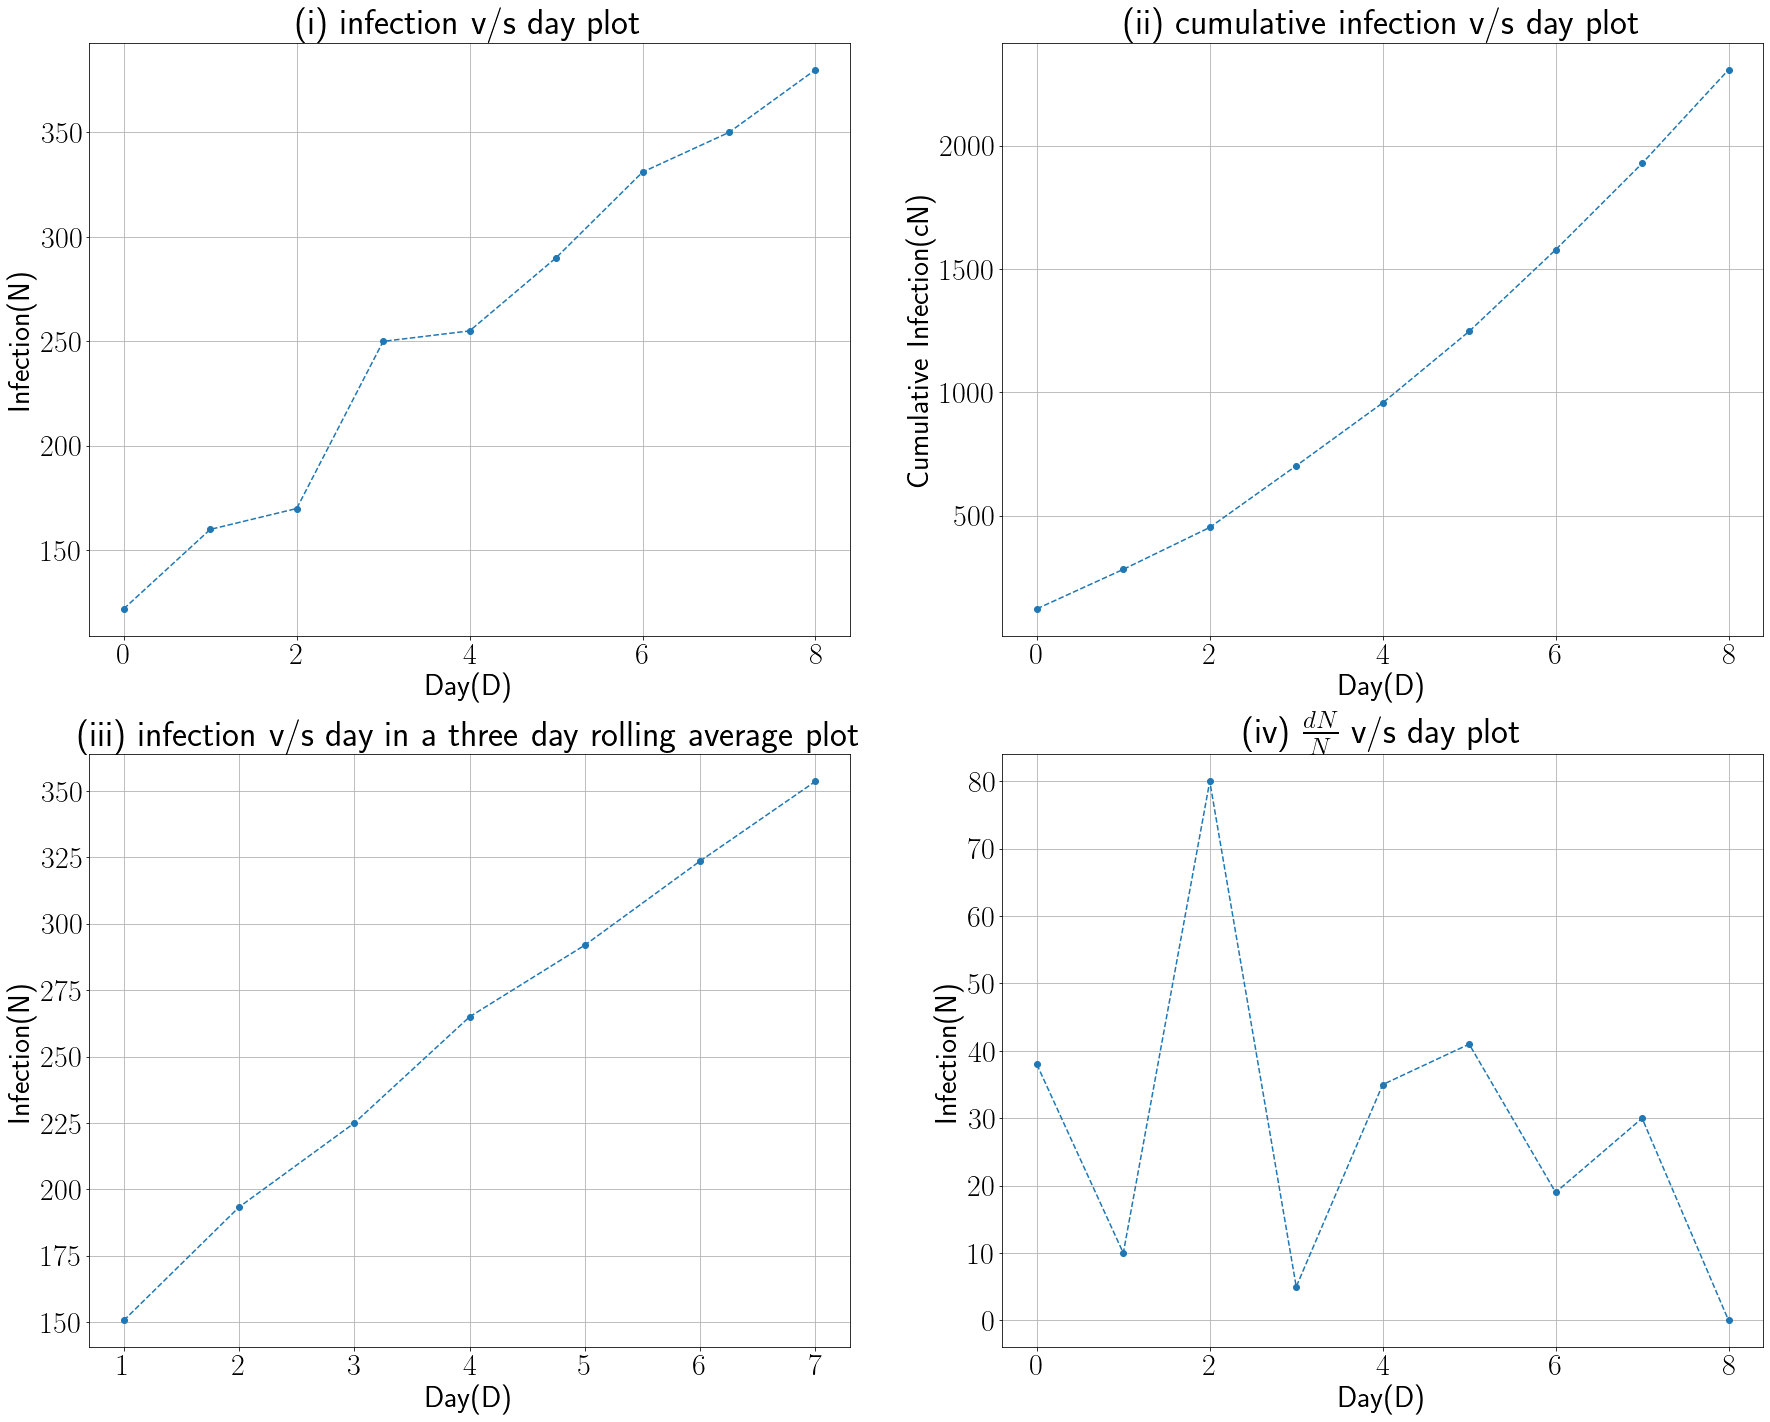

In [9]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(30,24))  

day=np.array([0,1,2,3,4,5,6,7,8])
N=np.array([122,160,170,250,255,290,331,350,380])
ax1.plot(day,N,linestyle='--',marker='o')
ax1.set_xlabel('Day(D)')
ax1.set_ylabel('Infection(N)')
ax1.set_title('(i) infection v/s day  plot')
ax1.grid(True)

cN=np.cumsum(N)
ax2.plot(day,cN,linestyle='--',marker='o')
ax2.set_xlabel('Day(D)')
ax2.set_ylabel('Cumulative Infection(cN)')
ax2.set_title('(ii) cumulative infection v/s day  plot')
ax2.grid(True)

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y=moving_average(N,3)
x=moving_average(day,3)
ax3.plot(x,y,linestyle='--',marker='o')
ax3.set_xlabel('Day(D)')
ax3.set_ylabel('Infection(N)')
ax3.set_title('(iii) infection v/s day in a three day rolling average plot')
ax3.grid(True)

s=np.diff(N)
s=np.append(s,0)
ax4.plot(day,s,linestyle='--',marker='o')
ax4.set_xlabel('Day(D)')
ax4.set_ylabel('Infection(N)')
ax4.set_title(r'(iv) $\frac{dN}{N}$ v/s day  plot')
ax4.grid(True)
plt.show()

### Q4. Write a NumPy program to append values to the end of an array. Go to the editor 
$\text{Expected Output: }\\ \qquad\qquad\qquad \text{Original array: } [10, 20, 30] \\ \qquad\qquad\qquad \text{After append values to the end of the array: }[10, 20, 30, 40, 50, 60, 70, 80, 90]$

In [10]:
A=np.array([10,20,30])
np.append(A,[i for i in range(40,100,10)])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

### Q5. Take a 2-D numpy array of 3x3 elements. Write a one liner code to swap the last row with the first.

In [11]:
a = np.array([[ 4, 3, 1],
              [ 5, 7, 0], 
              [ 9, 9, 3]])

print('row-swapped array :')
a[[2,0 ],: ] = a[[0, 2],: ]

a

row-swapped array :


array([[9, 9, 3],
       [5, 7, 0],
       [4, 3, 1]])

### Q6. Take a 2-D numpy array of 3x3 elements. Write a one liner code to swap the last column with the first. 

In [12]:
a = np.array([[ 4, 3, 1],
              [ 5, 7, 0], 
              [ 9, 9, 3]])

print('column-swapped array :')
a[:,[0, 2] ] = a[:,[2, 0]]  

a

column-swapped array :


array([[1, 3, 4],
       [0, 7, 5],
       [3, 9, 9]])

# $${\textbf{Assignment 3}}$$

### Q1. Run the following code:                        
`import numpy as np 
 X=10+30*np.random.rand(1000) 
 Y=X**2+2 `
    
### Q2. Repeat Q1  after running the following code
`import numpy as np
 X=10+30*np.random.rand(1000)
 Y=np.exp(-3/X)`
      
##### Find the histogram of the array Y. Find mean, median from the above histogram. Compare them with direct statistics calculation.  

In [13]:
def Histogram(y,n):
    mx,mi=max(y),min(y)
    mx=mx+mx*0.00001
    h=(mx-mi)/n
    p=[(mi+i*h) for i in range(n+1)]
    pr=[0 for i in range(n)]
    plt.rcParams["figure.figsize"] = (10,4)
    for i in y:
        k=int((i-mi)/h)
        pr[k]+=1  
    plt.bar([(i) for i in range(n)], pr)
    plt.title('For n=%i'%n)
    plt.show()
    
    r=list(zip(p,p[1:]))
    mn=sum([pr[i]*(r[i][0]+r[i][1])/2 for i in range(len(pr))])/sum(pr)
    print('calculated mean :',mn,'\tactual mean :',np.mean(y))

    c,l=0,0
    rp=sum(pr)/2
    while c<rp:
        if c+pr[l]>rp:
            break
        c+=pr[l]
        l+=1
    mdn=r[l][0]+((rp-c)*h)/pr[l]
    print('calculated median :',mdn,'\tactual median :',np.median(y))
    return None

In [14]:
x = 10 + 30*np.random.rand(1000)

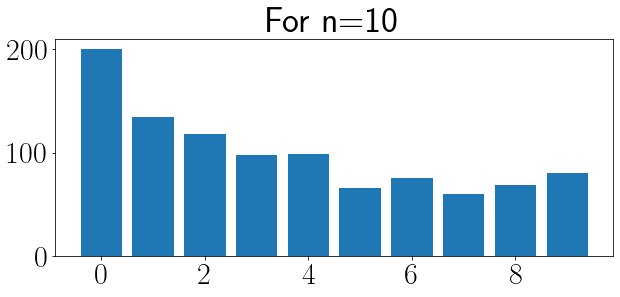

calculated mean : 707.0823593014719 	actual mean : 705.123171110702
calculated median : 624.974294423919 	actual median : 639.6662808962595


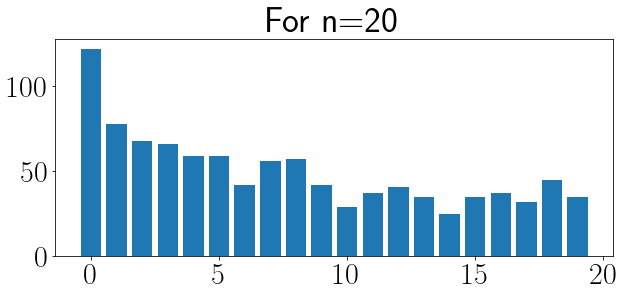

calculated mean : 705.2101535931292 	actual mean : 705.123171110702
calculated median : 634.5263643644428 	actual median : 639.6662808962595


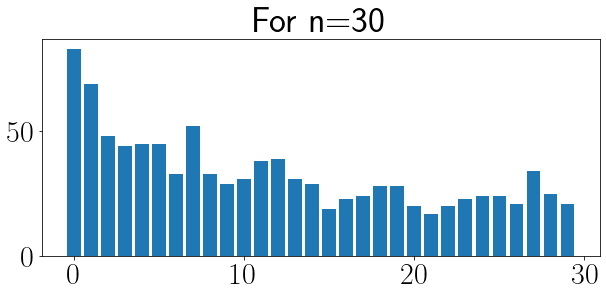

calculated mean : 704.6859359947933 	actual mean : 705.123171110702
calculated median : 632.1393739836067 	actual median : 639.6662808962595


In [15]:
y = x**2+2         # Q1
N = [10, 20, 30]
for n in N:
    Histogram(y,n)

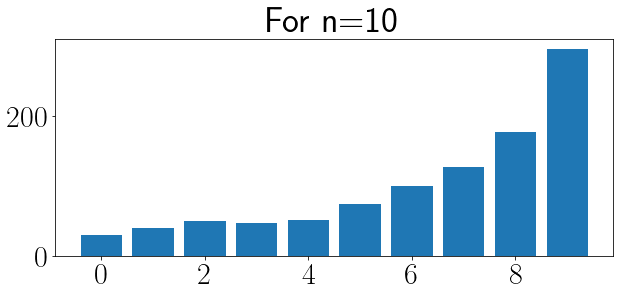

calculated mean : 0.8709536623464399 	actual mean : 0.8714536946473874
calculated median : 0.8866050250561188 	actual median : 0.8879834009043768


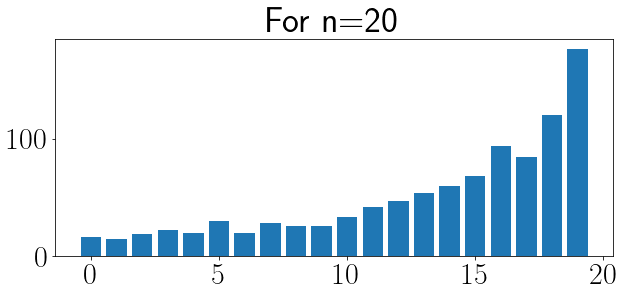

calculated mean : 0.8713734575018179 	actual mean : 0.8714536946473874
calculated median : 0.8868279554899389 	actual median : 0.8879834009043768


In [16]:
y = np.exp(-3/x)          # Q2
N = [10, 20]
for n in N:
    Histogram(y,n)

### Q3. Read the data h.txt uploaded in the class room. Find the histogram with 10 and 20 bins. 
#### Find also mean, median from the above histogram. Compare them with direct statistics calculation.

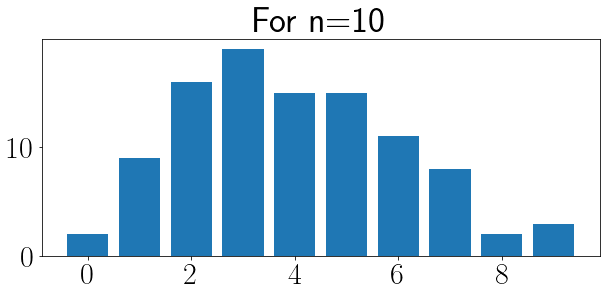

calculated mean : 5.243561286399999 	actual mean : 5.25907
calculated median : 5.159058367999999 	actual median : 5.175000000000001


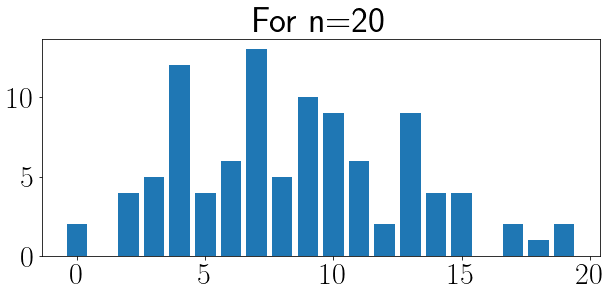

calculated mean : 5.2534639721500005 	actual mean : 5.25907
calculated median : 5.211872691999999 	actual median : 5.175000000000001


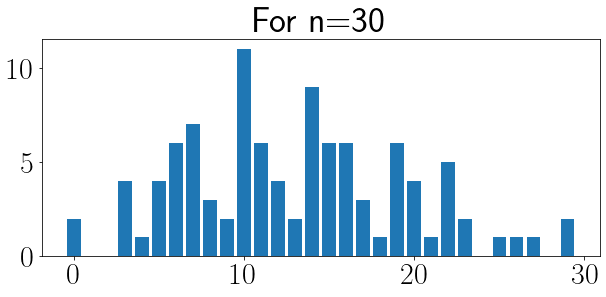

calculated mean : 5.252803793100001 	actual mean : 5.25907
calculated median : 5.18546553 	actual median : 5.175000000000001


In [17]:
y = np.loadtxt('h.txt')
N = [10, 20, 30]
for n in N:
    Histogram(y,n)

# $${\textbf{Assignment 4}}$$

### Q1. Use d1.txt to fit with the function $\displaystyle{ y = mx + c }$

## $$\displaystyle{m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2} \qquad c = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}{N\sum x_i^2 - (\sum x_i)^2} }$$

In [18]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x**2)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

In [19]:
plt.rcParams["figure.figsize"] = (15,6)

m : 5.162123314178963 		 c : -2.279160009472366


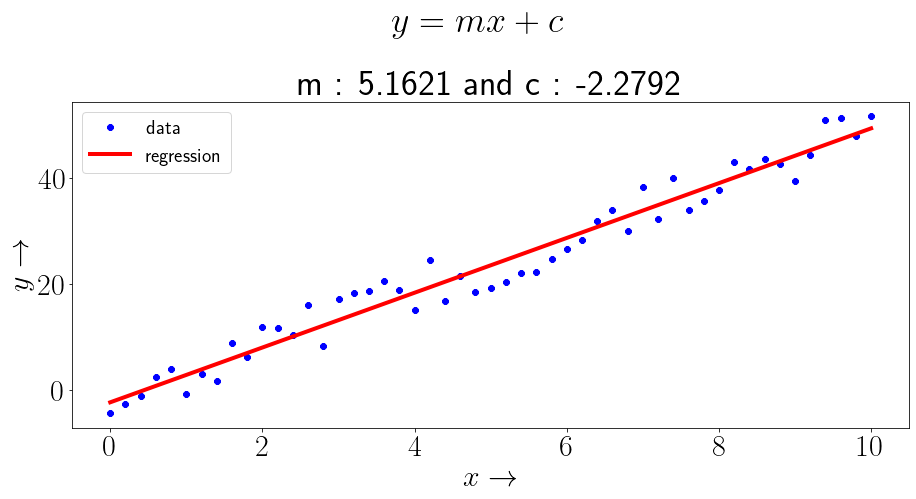

In [20]:
A1=np.loadtxt('d1.txt')
x=A1[:,0]
y=A1[:,1]
plt.plot(x,y,'b8',label='data')

m,c=fit(x,y)
Y=m*x+c
print('m :', m ,'\t\t c :',c)
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.suptitle(r'$y=mx+c$',y=1.1)
plt.title('m : %0.4f  and c : %0.4f '%(m,c))
#plt.grid(True)
plt.legend()
plt.show()

### 2. Use d2.txt to fit with the function $ \displaystyle{y = mx^2 + c}$

## $$\displaystyle{m = \frac{N\sum x_i^2 y_i - \sum x_i^2 \sum y_i}{N\sum x_i^4 - (\sum x_i)^4} \qquad c = \frac{\sum y_i \sum x_i^4 - \sum x_i^2 \sum x_i^2 y_i}{N\sum x_i^4 - (\sum x_i)^4}} $$

m : 2.0278366769475613 		 c : 6.361556161236751


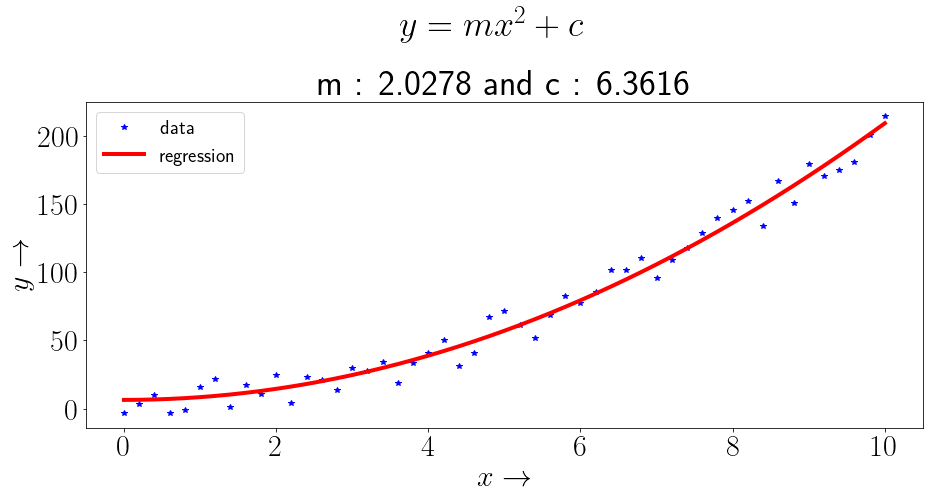

In [21]:
A2=np.loadtxt('d2.txt')
x=A2[:,0]
y=A2[:,1]
plt.plot(x,y, 'b*',label='data')

m,c=fit(x**2,y)
Y=m*x**2+c
print('m :', m ,'\t\t c :',c)
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.suptitle(r'$y=mx^2+c$',y=1.1)
plt.title('m : %0.4f  and c : %0.4f '%(m,c))
#plt.grid(True)
plt.legend()
plt.show()

### 3. Use d3.txt to fit with the function $ \displaystyle{y = \frac{a}{x^2} + b}$

## $$\displaystyle{a = \frac{N\sum {\frac{1}{x_i^2}} y_i - \sum {\frac{1}{x_i^2}} \sum y_i}{N\sum {\frac{1}{x_i^4}} - (\sum {\frac{1}{x_i^2}})^2} \qquad b = \frac{\sum y_i \sum {\frac{1}{x_i^4}} - \sum {\frac{1}{x_i^2}} \sum {\frac{1}{x_i^2}} y_i}{N\sum {\frac{1}{x_i^4}} - (\sum {\frac{1}{x_i^2}})^2} }$$

a : 3.0946860632401045 		 b : 9.996077635960587


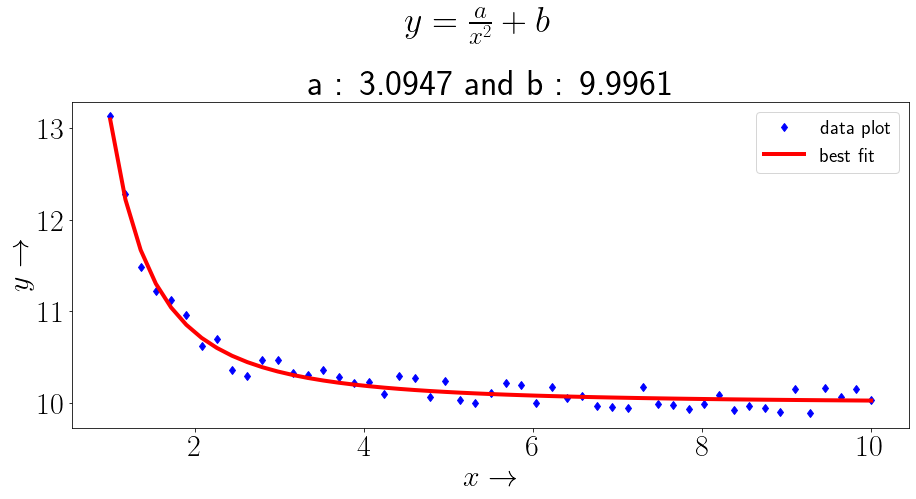

In [22]:
A3=np.loadtxt('d3.txt')
x=A3[:,0]
y=A3[:,1]
plt.plot(x,y, 'bd',label='data')

m,c=fit(1/(x**2),y)
Y=(m/(x**2))+c
print('a :', m ,'\t\t b :',c)
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.suptitle(r'$y=\frac{a}{x^2}+b$',y=1.1)
plt.title('a : %0.4f  and b : %0.4f '%(m,c))
#plt.grid(True)
plt.legend(['data plot','best fit'])
plt.show()

### 4. Use d4.txt to fit with the function $\displaystyle{y = a \exp(-\frac{x}{x_0})} $

### $\displaystyle{ \log y = -\frac{x}{x_0} + \log a => Y = xm + c }$
### $\displaystyle{\text{where} \qquad Y=\log y , \qquad m=-\frac{1}{x_0}, \qquad c=\log a =>  a=\exp(c)}$
   

## $$\displaystyle{m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2} \qquad c = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}{N\sum x_i^2 - (\sum x_i)^2}} $$   

x₀ : 3.0422247381722474 		 a : 2.8966152953748767


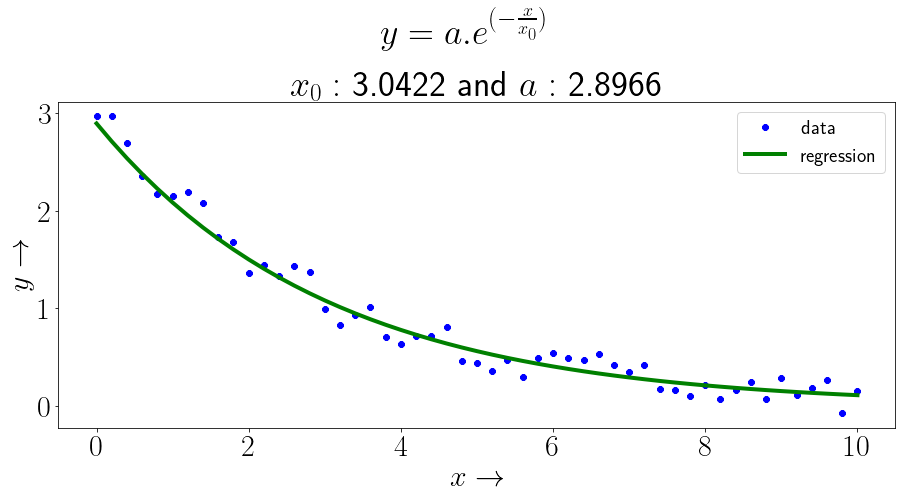

In [23]:
A4=np.loadtxt('d4.txt')
x=A4[:,0]
y=A4[:,1]
plt.plot(x,y, 'b8',label='data')

B=np.array([i for i in A4 if i[0]>0 and i[1]>0])
m,c=fit(B[:,0],np.log(B[:,1]))
a=np.exp(c)
x0=(-1/m)
Y=a*np.exp(-x/x0)

print('x\u2080 :', x0 ,'\t\t a :',a)
plt.plot(x,Y,'g',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.title(r'$x_0 :$ %0.4f  and $a :$ %0.4f '%(x0,a))
plt.suptitle(r'$y=a.e^{(-\frac{x}{x_0})}$',y=1.1)
#plt.grid(True)
plt.legend()
plt.show()

### 5. Use d5.txt to fit with the function $\displaystyle{y = ax^k}$

### $\displaystyle{\log y =  k\log x + \log a => Y = mX + c }$
### $\displaystyle{\text{where} \qquad Y = \log y ,\qquad m=k ,\qquad X = \log x ,\qquad c = \log a=>a=\exp(c)}$

## $$\displaystyle{m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2} \qquad c = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}{N\sum x_i^2 - (\sum x_i)^2} }$$

k : 3.0408781654466184 		 a : 0.9141216120174546


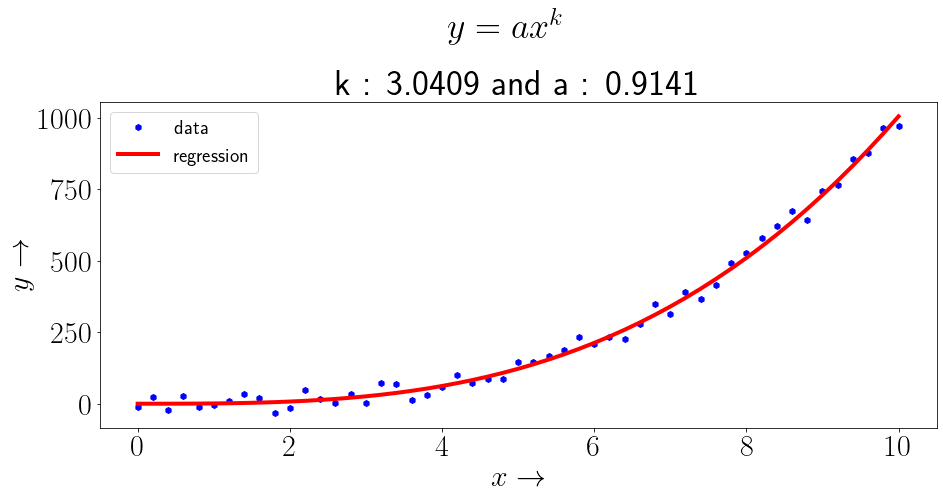

In [24]:
A5=np.loadtxt('d5.txt')
X=A5[:,0]
Y=A5[:,1]
plt.plot(X,Y, 'bh',label='data')

m,c=fit(np.log(A5[16:,0]),np.log(A5[16:,1]))
a=np.exp(c)
y=a*(X**m)
print('k :', m ,'\t\t a :',a)
plt.plot(X,y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$x \rightarrow $')
plt.ylabel(r'$y \rightarrow $')
plt.title('k : %0.4f and a : %0.4f '%(m,a))
plt.suptitle(r'$y=ax^k $',y=1.1)
#plt.grid(True)
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------